In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk

from sklearn.decomposition import PCA

In [27]:
raster_dir = "/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_numpy/"
output_dir = "/shares/wegner.ics.uzh/CHELSA/input/"

In [28]:
rasters = []
subsample = 360
for month in ["03","06","09","12"]:
    ras = np.load(raster_dir + month + "_monthly_float16.npy", mmap_mode="r")[:,int(month)::subsample,int(month)::subsample]
    land = np.where(ras[0]<30)
    rasters.append(ras[:,land[0],land[1]])
    print(rasters[-1].shape)

(11, 1731)
(11, 6783)
(11, 1730)
(11, 1714)


In [29]:
rasters = np.concatenate(rasters, axis=1)
rasters.shape

(11, 11958)

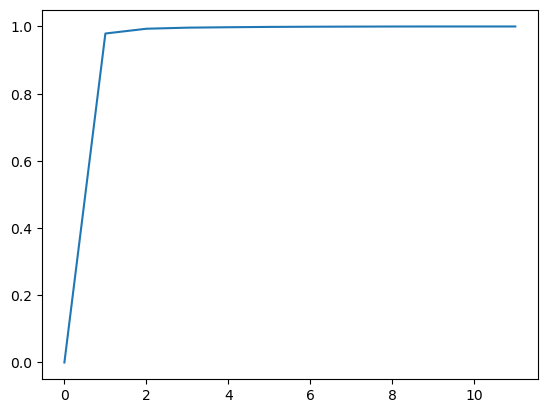

In [30]:
pca_no_whiten = PCA().fit(rasters.T)
evrs = pca_no_whiten.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot([sum(evrs[:i]) for i in range(len(evrs)+1)])
plt.show()

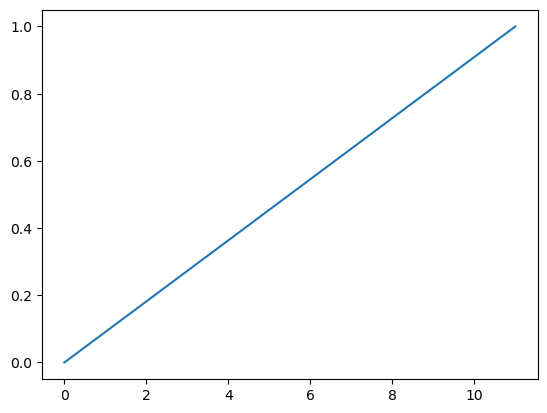

In [31]:
pca_whiten = PCA(whiten=True).fit(rasters.T)
#pk.dump(pca_whiten, open(output_dir + "whiten_pca_components.pkl","wb"))

#pca_whiten = pk.load(open(output_dir + "whiten_pca_components.pkl",'rb')) 
whitened_data = pca_whiten.transform(rasters.T)

pw = PCA().fit(whitened_data)
evrs = pw.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot([sum(evrs[:i]) for i in range(len(evrs)+1)])
plt.show()